In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import Lasso

In [6]:
from sklearn import metrics

In [8]:
data = pd.read_csv("car data.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
data.shape

(301, 9)

In [15]:
#checking the distribution of categorical data
print(data.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [16]:
print(data.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [17]:
print(data.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [19]:
# encoding the categorical data
# encoding fuel type column
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [20]:
#encoding the seller type column
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [21]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [22]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [23]:
#splitting the dataset into training data and test data
X = data[["Year","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]
y = data["Selling_Price"]

In [24]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.6 KB


In [26]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [27]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 301 entries, 0 to 300
Series name: Selling_Price
Non-Null Count  Dtype  
--------------  -----  
301 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [31]:
# Model Selection
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
# prediction
prediction = lr.predict(X_train)

In [39]:
#model evaluation
error = metrics.r2_score(y_train,prediction)
print(error)

0.8799451660493716


In [41]:
final_prediction = lr.predict(X_test)

In [42]:
print(final_prediction)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [45]:
error_final = metrics.r2_score(y_test,final_prediction)
print(error_final)

0.836576671502587


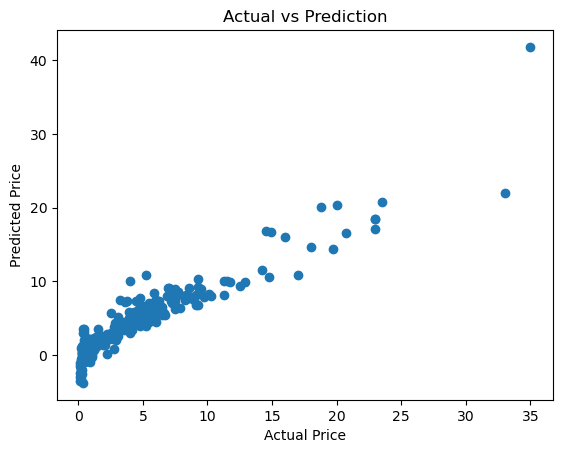

In [50]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Prediction")
plt.show()

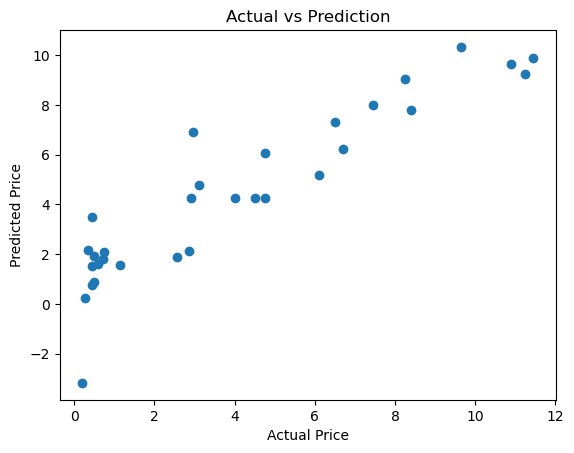

In [52]:
plt.scatter(y_test,final_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Prediction")
plt.show()